## US Oil and Gas Production

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt


/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


---

Let's load the Gas production:

In [2]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [3]:
gas_df.shape

(121, 20)

In [4]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [5]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [6]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [7]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')
gas_df["Month"].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Month, dtype: datetime64[ns]

In [8]:
gas_df.dtypes[0:2]

Month    datetime64[ns]
U.S.              int64
dtype: object

Months are now in datetime format and easy to explore!

In [9]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [10]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

How much gas has been produced yearly globally and in every state of the US?

In [11]:
gas_df.head()

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [12]:
gas_df["years"] = gas_df['Month'].dt.year
yearly_gas = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California,years
Month,,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240,14056
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071,24108
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521,24120
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181,24132
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092,24144


Text(0, 0.5, 'G Production')

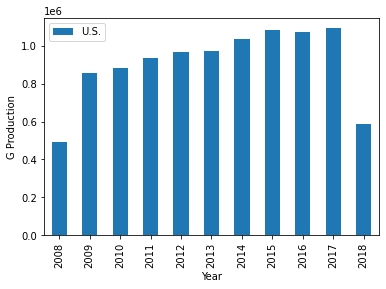

In [13]:
plot = yearly_gas.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")
plot.set_ylabel("G Production")

In [14]:
yearly_gas = yearly_gas[np.logical_and(yearly_gas.index >= 2009, yearly_gas.index <= 2017)]

Text(0, 0.5, 'G Production')

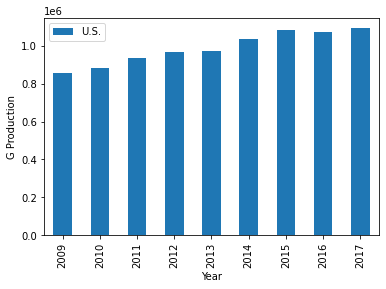

In [15]:
plot = yearly_gas.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")
plot.set_ylabel("G Production")

### State production

Let's have a look at the yearly production of some specific states.

insert a new cell and write the code to plot linecharts of the gas production of four states of your choice? You can start from the full_yearly_gas_df dataframe

In [16]:
yearly_gas.columns[1:].sort_values()


Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming', 'years'],
      dtype='object')

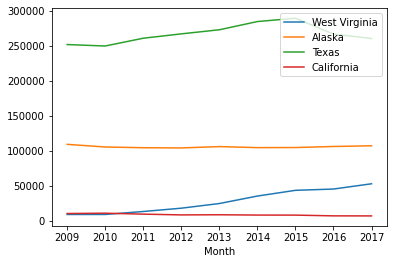

In [17]:
yearly_gas[['West Virginia','Alaska','Texas','California']].plot.line()

---

## Comparing with Crude Oil Production

In [18]:
pwd

'/Users/jessicaparker/code/MariamAmmar/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production'

In [25]:
file = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")
oil_df.head(3)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


In [74]:
yearly_gas = gas_df.groupby(gas_df['Month'].dt.year).sum().filter(items=['U.S.'])
yearly_gas.columns = [ 'Gas' ]
yearly_gas.head(3)

,Gas
Month,
2008,489473
2009,856876
2010,881622


In [75]:
yearly_oil = oil_df.groupby(oil_df['Month'].dt.year).sum().filter(items=['U.S. Crude Oil'])
yearly_oil.columns = [ 'Crude Oil' ]
yearly_oil.head(3) 

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741


In [76]:
yearly_merged = pd.concat([yearly_oil,yearly_gas], axis = 0)

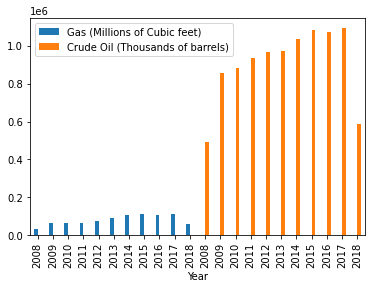

In [81]:
plot = yearly_merged.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)'])